<a href="https://colab.research.google.com/github/nshea3/SEG_carbonate_data/blob/master/SEG_Facies_Classification_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

data = pd.read_csv('https://raw.githubusercontent.com/seg/2016-ml-contest/master/training_data.csv')


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold , StratifiedKFold
from sklearn.metrics import confusion_matrix, f1_score
from sklearn import preprocessing
from sklearn.model_selection import LeavePGroupsOut
from sklearn.multiclass import OneVsOneClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.signal import medfilt

In [0]:
#Load Data
data = pd.read_csv('https://raw.githubusercontent.com/seg/2016-ml-contest/master/facies_vectors.csv')

# Parameters
feature_names = ['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS']
facies_names = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS', 'WS', 'D', 'PS', 'BS']
facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00', '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']

# Store features and labels
X = data[feature_names].values 
y = data['Facies'].values 

# Store well labels and depths
well = data['Well Name'].values
depth = data['Depth'].values

# Fill 'PE' missing values with mean

#**************Is this valid? 


def preprocess(df, features, targets):
  X = data[feature_names]
  y = data[targets]
  imp = preprocessing.Imputer(missing_values='NaN', strategy='mean', axis=0)
  imp.fit(X)
  X = imp.transform(X)
  return X, y



In [0]:
data_by_well = {well:data[data['Well Name'] == well] for well in data['Well Name'].unique()}

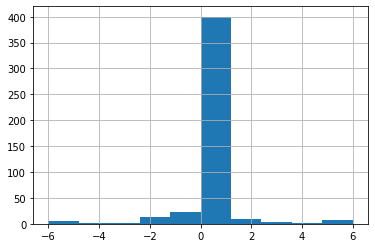

In [0]:
data_by_well['ALEXANDER D']['Facies'].diff().hist()

In [0]:
from itertools import groupby

def rl_encode(ser):
  return [sum(g) / b for b, g in groupby(ser) if b]

In [0]:
data_by_well['ALEXANDER D']['Facies'].values

array([3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 2, 3, 9, 9, 9, 3, 3, 2, 2, 3, 3, 9, 9, 7, 7, 6, 6,
       6, 7, 7, 7, 7, 4, 4, 4, 4, 4, 4, 8, 6, 6, 5, 5, 6, 6, 6, 8, 8, 8,
       8, 8, 8, 6, 6, 5, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 5,
       6, 6, 6, 4, 4, 4, 4, 4, 4, 6, 6, 6, 8, 8, 3, 3, 3, 2, 2, 2, 2, 2,
       3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 2, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 5, 5, 5, 6, 6, 8, 8, 8,
       8, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2,
       2, 3, 3, 5, 5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 6,
       8, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 3, 3, 8, 8, 8, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 8, 8, 8, 8, 8, 8, 3, 3, 3, 3,
       3, 3, 3, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 6, 6,
       6, 7, 7, 8, 8, 8, 8, 6, 5, 6, 8, 8, 3, 3, 3,

In [0]:
rl_codes = []

for well_df in data_by_well.items():
  rl_codes.extend([(b, sum(1 for x in g)) for b, g in groupby(well_df[1].Facies.values)])

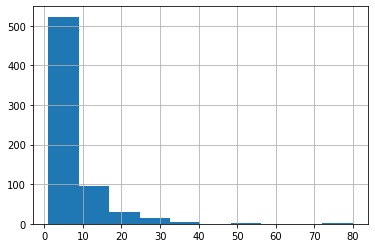

In [0]:
#import seaborn as sns

rl_codes_df = pd.DataFrame(rl_codes)
rl_codes_df.columns = ["facies_code", "length"]

rl_codes_df["length"].hist()

In [0]:
rl_codes_df.facies_code.unique()

array([3, 2, 8, 6, 7, 4, 5, 9, 1])

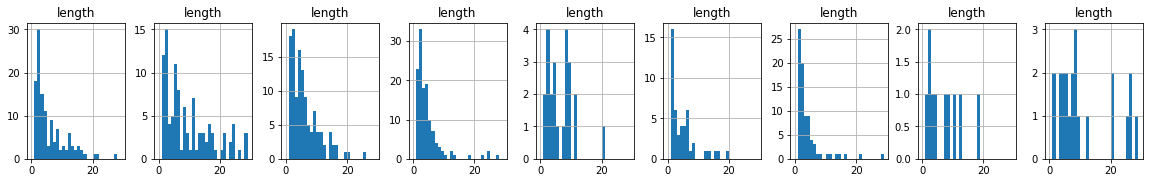

In [0]:
fig, axes = plt.subplots(1, 9, figsize=(20,2.5))

for idx, fac in enumerate(rl_codes_df.facies_code.unique()):
  rl_codes_df[rl_codes_df['facies_code'] == fac].hist('length', bins=range(0,30), ax=axes[idx])

#dflux.hist('rate', ax=axes[0])
#dflux2.hist('rate', ax=axes[1])
#dflux.hist('rate', ax=axes[2])

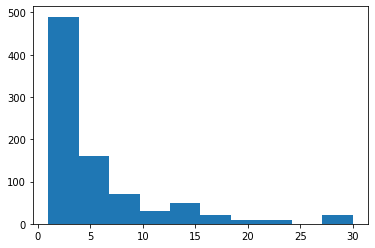

In [0]:
rl_codes = []
for well_df in data_by_well.items():
  rl_codes.extend(rl_encode(data_by_well['ALEXANDER D']['Facies'].values))


plt.hist(rl_codes)
plt.show()

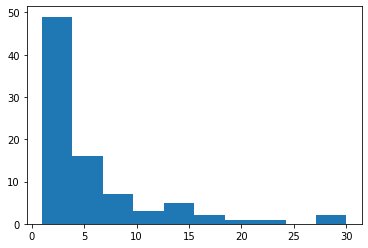

In [0]:
plt.hist(rl_encode(data_by_well['ALEXANDER D']['Facies'].values))
plt.show()

In [0]:
def augment_unit_width(well_dframe):
  data_by_well = {well:data[data['Well Name'] == well].sort_values('Depth') for well in well_dframe['Well Name'].unique()}
  for well_df in data_by_well.items():
    well_streak = [sum(1 for x in g) for b, g in groupby(well_df[1].Facies.values)]
    well_df[1]['unitwidth'] = np.array([b for b in well_streak for _ in range(b)])
  augment_dfbywell = pd.concat(data_by_well).reset_index().sample(frac=1)
  return augment_dfbywell



In [0]:
for well_df in data_by_well.items():
 well_streak = [sum(1 for x in g) for b, g in groupby(well_df[1].Facies.values)]
 well_df[1]['unitwidth'] = np.array([b for b in well_streak for _ in range(b)])
 print([b for b in well_streak for _ in range(b)])

[14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 2, 2, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8, 2, 2, 4, 4, 4, 4, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 2, 2, 5, 5, 5, 5, 5, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 6, 6, 6, 6, 6, 6, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 7, 7, 7, 7, 7, 7, 7, 4, 4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 9, 9, 9, 9, 9, 9, 9, 9, 9, 4, 4, 4, 4, 3, 3, 3, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 3, 3, 3, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 4, 4, 4, 4, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 7, 7, 7, 7, 7, 7, 7, 2, 2, 2, 2, 2, 2, 12, 12, 12, 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
data_by_well['ALEXANDER D'].head(20)

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,unitwidth
471,3,A1 SH,ALEXANDER D,2887.5,88.71,0.612,6.7,10.605,NaN,1,1.000,7
472,3,A1 SH,ALEXANDER D,2888.0,92.71,0.583,11.0,12.515,NaN,1,0.974,7
473,3,A1 SH,ALEXANDER D,2888.5,94.54,0.579,12.0,13.410,NaN,1,0.949,7
474,3,A1 SH,ALEXANDER D,2889.0,95.31,0.579,11.5,13.750,NaN,1,0.923,7
475,3,A1 SH,ALEXANDER D,2889.5,93.79,0.572,10.3,13.405,NaN,1,0.897,7
476,3,A1 SH,ALEXANDER D,2890.0,86.00,0.547,9.7,12.920,NaN,1,0.872,7
477,3,A1 SH,ALEXANDER D,2890.5,83.66,0.531,9.9,12.750,NaN,1,0.846,7
478,2,A1 SH,ALEXANDER D,2891.0,84.96,0.516,10.0,12.710,NaN,1,0.821,2
479,2,A1 SH,ALEXANDER D,2891.5,88.93,0.515,9.4,13.510,NaN,1,0.795,2
480,3,A1 SH,ALEXANDER D,2892.0,91.35,0.521,7.4,15.330,NaN,1,0.769,3


In [0]:
!pip install git+https://github.com/nekoumei/dtreeplt.git

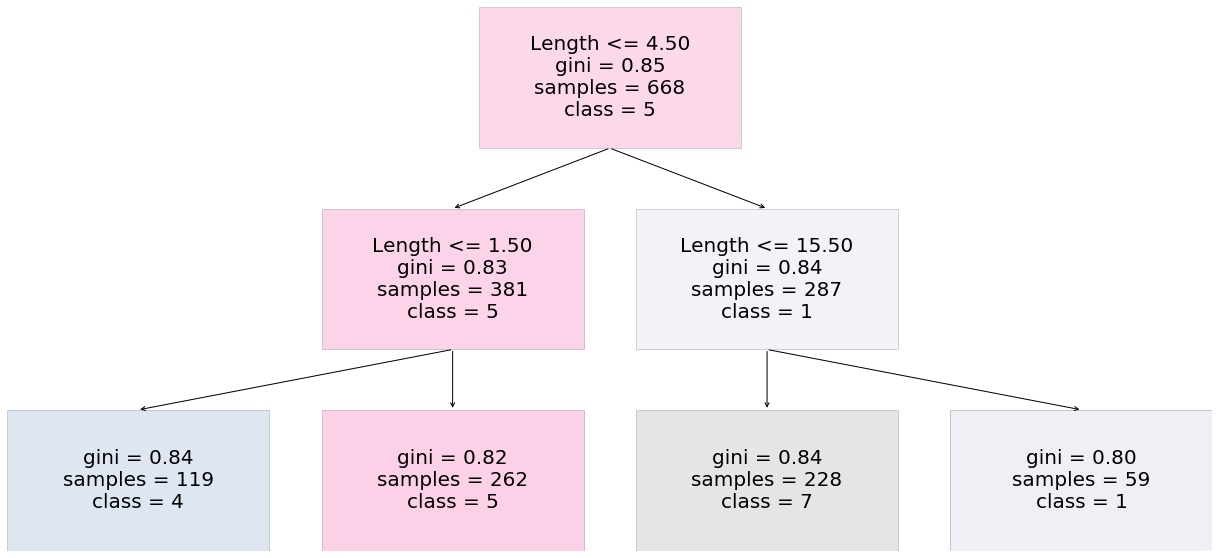

In [0]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from dtreeplt import dtreeplt

rl_codes_df

model = DecisionTreeClassifier(max_depth=2)
model.fit(rl_codes_df.length.values.reshape(-1, 1), rl_codes_df.facies_code.values.reshape(-1, 1))



dtree = dtreeplt(
    model=model,
    feature_names=["Length"],
    target_names=range(9),
    disp_values=False
)
fig = dtree.view()

In [0]:
rl_codes_df["length"].value_counts()

2     129
1     119
4      70
3      63
5      48
6      43
8      31
7      20
9      18
11     16
12     14
10     11
16     10
14     10
13      9
15      8
20      6
24      6
21      5
17      4
18      3
29      3
26      3
19      2
23      2
25      2
27      2
28      2
52      1
22      1
30      1
32      1
34      1
37      1
38      1
39      1
80      1
Name: length, dtype: int64

In [0]:
rl_codes = []

for well_df in data_by_well.items():
  rl_codes.extend([(b, sum(1 for x in g)) for b, g in groupby(data_by_well['ALEXANDER D']['Facies'].values)])

In [0]:
rl_codes[0]

(3, 7)

In [0]:
df_by_well = pd.concat(data_by_well).reset_index().sample(frac=1)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


ValueError: ignored

In [0]:
y_df



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.77128427, 0.76066522, 0.75434783])

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

X_df = df_by_well[feature_names]
y_df = df_by_well['Facies']

imp = preprocessing.Imputer(missing_values='NaN', strategy='mean', axis=0)
imp = imp.fit(X_df)
X_df = imp.transform(X_df)

est = GradientBoostingClassifier(learning_rate=0.12,
                                 max_depth=3,
                                 n_estimators=150,
                                 )

cross_val_score(est, X_df, y_df)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.67676768, 0.65509761, 0.67681159])

In [0]:
X_df = df_by_well[feature_names + ['unitwidth']]

imp = preprocessing.Imputer(missing_values='NaN', strategy='mean', axis=0)
imp = imp.fit(X_df)
X_df = imp.transform(X_df)

est = GradientBoostingClassifier(learning_rate=0.12,
                                 max_depth=3,
                                 n_estimators=150,
                                 )

cross_val_score(est, X_df, y_df)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.76190476, 0.75777296, 0.75507246])

In [0]:
est.fit(X_df, y_df)
est.feature_importances_
print(feature_names + ['unitwidth'])

['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS', 'unitwidth']


In [0]:
est.feature_importances_

array([0.13022484, 0.07364744, 0.06087846, 0.13217216, 0.06600327,
       0.23774058, 0.06487357, 0.23445969])

In [0]:
{feat:imp for feat, imp in zip(feature_names + ['unitwidth'], est.feature_importances_)}

{'DeltaPHI': 0.06087845871660647,
 'GR': 0.13022483726228876,
 'ILD_log10': 0.07364743726360228,
 'NM_M': 0.2377405777000428,
 'PE': 0.06600327162168934,
 'PHIND': 0.13217216296030335,
 'RELPOS': 0.06487356800777831,
 'unitwidth': 0.2344596864676886}

<BarContainer object of 8 artists>

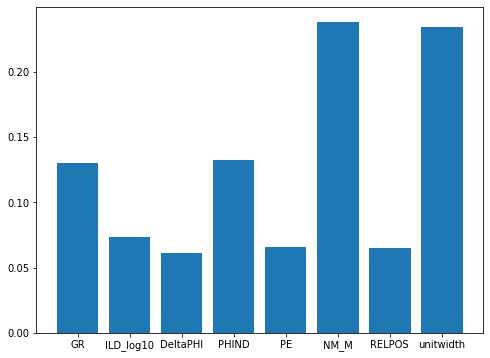

In [0]:
plt.figure(figsize=(8,6))
plt.bar(feature_names + ['unitwidth'], est.feature_importances_)

In [0]:
import pandas as pd

test_data = pd.read_csv('https://raw.githubusercontent.com/seg/2016-ml-contest/master/validation_data_nofacies.csv')



In [0]:
test_data['Well Name'].unique()

array(['STUART', 'CRAWFORD'], dtype=object)

In [0]:
#Load testing data

    # Train classifier
    #clf = make_pipeline(make_union(VotingClassifier([("est", ExtraTreesClassifier(criterion="gini", max_features=1.0, n_estimators=500))]), FunctionTransformer(lambda X: X)), XGBClassifier(learning_rate=0.73, max_depth=10, min_child_weight=10, n_estimators=500, subsample=0.27))
    #clf =  make_pipeline( KNeighborsClassifier(n_neighbors=5, weights="distance") ) 
    #clf = make_pipeline(MaxAbsScaler(),make_union(VotingClassifier([("est", RandomForestClassifier(n_estimators=500))]), FunctionTransformer(lambda X: X)),ExtraTreesClassifier(criterion="entropy", max_features=0.0001, n_estimators=500))
    # * clf = make_pipeline( make_union(VotingClassifier([("est", BernoulliNB(alpha=60.0, binarize=0.26, fit_prior=True))]), FunctionTransformer(lambda X: X)),RandomForestClassifier(n_estimators=500))

# # Prepare training data
# X_tr = X
# y_tr = y

# # Augment features
# X_tr, padded_rows = augment_features(X_tr, well, depth)

# # Removed padded rows
# X_tr = np.delete(X_tr, padded_rows, axis=0)
# y_tr = np.delete(y_tr, padded_rows, axis=0) 

# Prepare test data

#test_data['logF/logphi'] = test_data['ILD_log10'] / np.log10(test_data['PHIND'])

well_ts = test_data['Well Name'].values
depth_ts = test_data['Depth'].values
X_ts = test_data[feature_names].values


    
y_pred = []
print('.' * 20)
for seed in range(20):
    np.random.seed(seed)

    # Make training data.
    X_train, padded_rows = augment_features(X, well, depth)
    y_train = y
    X_train = np.delete(X_train, padded_rows, axis=0)
    y_train = np.delete(y_train, padded_rows, axis=0) 

    # Train classifier  
    clf = make_pipeline(XGBClassifier(learning_rate=0.12,
                                      max_depth=5,
                                      min_child_weight=10,
                                      n_estimators=175,
                                      seed=seed,
                                      colsample_bytree=0.9))

    # Make blind data.
    X_test, _ = augment_features(X_ts, well_ts, depth_ts)

    # Train and test.
    y_ts_hat = train_and_test(X_train, y_train, X_test, well_ts, clf)
    
    # Collect result.
    y_pred.append(y_ts_hat)
    print('|', end='')
    
np.save('LA_Team_100_realizations.npy', y_pred)

....................
||||||||||||||||||||

In [0]:
from sklearn.metrics import confusion_matrix

PRED = pd.read_csv('https://raw.githubusercontent.com/seg/2016-ml-contest/master/prediction_depths.csv')
PRED.set_index(["Well Name", "Depth"], inplace=True)
PRED.head()

TRUE = pd.read_csv('https://raw.githubusercontent.com/seg/2016-ml-contest/master/blind_stuart_crawford_core_facies.csv')
TRUE.rename(columns={'Depth.ft': 'Depth'}, inplace=True)
TRUE.rename(columns={'WellName': 'Well Name'}, inplace=True)
TRUE.set_index(["Well Name", "Depth"], inplace=True)
TRUE.head()


def get_accuracies(y_preds):
    """
    Get the F1 scores from all the y_preds.
    y_blind is a 1D array. y_preds is a 2D array.
    """
    accs = []
    for y_pred in y_preds:
        PRED['Facies'] = y_pred
        all_data = PRED.join(TRUE, how='inner')
        y_blind = all_data['LithCode'].values
        y_pred = all_data['Facies'].values
        y_pred = y_pred[y_blind!=11]
        y_blind = y_blind[y_blind!=11]
        cv_conf = confusion_matrix(y_blind, y_pred)
        #sns.heatmap(cv_conf, annot=True, fmt="d")
        accs.append(accuracy(cv_conf))
    return np.array(accs)